In [1]:
import pandas as pd
import numpy as np
import requests
import time
from random import randint
from bs4 import BeautifulSoup as BS
headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.122 Safari/537.36'}

In [2]:
url_for_func = 'https://www.amazon.com/Nintendo-Switch-Neon-Blue-Red-Joy%E2%80%91/dp/B07YMPLCXM/ref=sr_1_8?keywords=nintendo+switch+console&qid=1583592513&sr=8-8'

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script><!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/><link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/><link href="https://m.media-amazon.com" rel="dns-prefetch"/><link href="https://completion.amazon.com" rel="dns-prefetch"/><script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])}
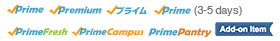
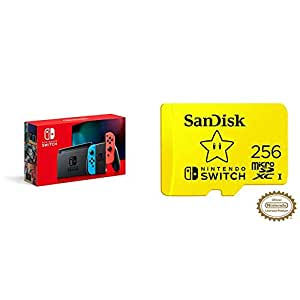

In [3]:
# def data_acq_for_one_seller(url_for_func):
url = url_for_func
response=requests.get(url, headers=headers)
#delay()
soup=BS(response.content, features="lxml")
print(soup)

#product name

product_name_source_codes = ['#productTitle', '#title_feature_div']
for i in product_name_source_codes:
    try:
        product_name = soup.select(i)[0].get_text().strip()
    except:
        pass

#seller
try:
    seller = soup.select('#sellerProfileTriggerId')[0].get_text().strip()
except:
    pass

#price
price_source_codes = ['priceblock_ourprice .a-spacing-none', 
                      'priceblock_saleprice', 
                      '#unifiedPrice_feature_div', 
                      '#priceblock_ourprice']
for i in price_source_codes:
    try:
        price = soup.select(i)[0].get_text().strip()
    except:
        pass

#condition
try:
    condition = soup.select('#new-button-label')[0].get_text().strip()
except:
    pass

#brand

brand_source_codes = ['#bylineInfo', '#bylineInfo_feature_div']
for i in brand_source_codes:
    try:
        brand = soup.select(i)[0].get_text().strip()
    except:
        pass

#features
try:
    feature_name1 = soup.select('#variation_color_name .a-form-label')[0].get_text().strip()
except:
    pass
try:
    feature1 = soup.select('#variation_color_name .selection')[0].get_text().strip()
except:
    pass
try:
    feature_name2 = soup.select('#variation_style_name .a-form-label')[0].get_text().strip()
except:
    pass
try:
    feature2 = soup.select('#variation_style_name .selection')[0].get_text().strip()
except:
    pass

In [4]:
product_name

NameError: name 'product_name' is not defined

In [2]:
def delay():
    delays = randint(10, 21)
    delay = np.random.choice(delays)
    return time.sleep(delay)


#DATA ACQUISITION FUNCTION for More-Sellers Products
def data_acquisition(url_for_func):
    price_list = []
    condition_list = []
    seller_list = []
    for i in range(1,2):       
        url = url_for_func[:51] + 'ref=olp_page_{}?ie=UTF8&f_all=true&startIndex={}0'.format(str(i), str(i-1))
        response=requests.get(url, headers=headers)
        delay()
        soup=BS(response.content, features="lxml") 
        
        #url_previous = url_for_func[:51] + 'ref=olp_page_{}?ie=UTF8&f_all=true&startIndex={}0'.format(str(i-1), str(i-2))
        #response_previous=requests.get(url_previous, headers=headers)
        #soup_previous=BS(response_previous.content, features="lxml") 
        
        
        #if hash(soup_main) != hash(soup_main_previous):
        
        child_list = [3,5,7,9,12,14,16,18,20,22]
        for i in child_list:
            try:
                price_list.append(soup.select('.olpOffer:nth-child({}) .olpOfferPrice'.format(str(i)))[0].get_text().strip())
            except:
                price_list.append(np.nan)  
            try:
                condition_list.append(soup.select('.olpOffer:nth-child({}) .olpCondition'.format(str(i)))[0].get_text().strip())
            except:
                condition_list.append(np.nan)
            try:
                seller_list.append(soup.select('.olpOffer:nth-child({}) .a-text-bold a'.format(str(i)))[0].get_text().strip())
            except:
                seller_list.append(np.nan)
        #else:
            #break

    df = pd.DataFrame(list(zip(price_list, condition_list, seller_list)), columns= ['Price', 'Condition', 'Seller']) 

    try:
        product_name=soup.select("#olpProductDetails .a-spacing-none")[0].get_text().strip()
    except:
        product_name = np.nan
    df['ProductName'] = product_name   
    
    try:
        brand = soup.select('#olpProductByline')[0].get_text().strip()
    except:
        brand = np.nan
    df['Brand'] = brand
    
    try:
        Feature1Name = soup.select('.a-spacing-micro:nth-child(1) .a-size-base:nth-child(1)')[0].get_text().strip()
        Feature1 = soup.select('.a-spacing-micro:nth-child(1) .a-text-bold')[0].get_text().strip()
    except:
        Feature1Name = np.nan
        Feature1 = np.nan
    df['Feature1Name'] = Feature1Name
    df['Feature1'] = Feature1

    try:
        Feature2Name = soup.select('.a-spacing-small+ .a-spacing-micro .a-size-base:nth-child(1)')[0].get_text().strip()
        Feature2 = soup.select('.a-spacing-small+ .a-spacing-micro .a-text-bold')[0].get_text().strip()
    except:
        Feature2Name = np.nan
        Feature2 = np.nan
    df['Feature2Name'] = Feature2Name
    df['Feature2'] = Feature2  
    return df
    

In [3]:
# 1: 'see all buying options'
# 2: 'Other Sellers on Amazon'
# 3: 'New (x) from $y.00' OR 'Used (x) from $y.00'
# 4 : Available from these sellers.

links = ['https://www.amazon.com/s?k=nintendo+switch+console&page=', 
]
"""
'https://www.amazon.com/s?k=nintendo+switch+console&page=',
'https://www.amazon.com/s?k=robot+vacuum+cleaner&page=',
'https://www.amazon.com/s?k=apple+iphone+11+pro%2C+256gb&rh=p_89%3AApple&dc&page=',
'https://www.amazon.com/s?k=aorus+geforce+rtx+2070&page='"""

df_main = pd.DataFrame(columns = ['Price', 'Condition', 'Seller', 'ProductName', 'Brand',
                                 'Feature1Name', 'Feature1', 'Feature2Name', 'Feature2'])

for link in links:
    for pn in range(1,2):
        url_main = link + str(pn)
        #url_previous = link + str(pn-1)
        print(url_main)
        response_main=requests.get(url_main, headers=headers)
        delay()
        soup_main=BS(response_main.content, features="lxml")
        #response_main_previous=requests.get(url_previous, headers=headers)
        #soup_main_previous=BS(response_main_previous.content, features="lxml")
        
        #if hash(soup_main) != hash(soup_main_previous):
        a = soup_main.select('a.a-link-normal.a-text-normal')
        url_link_list = []
        for i in a:
            url_link = 'https://www.amazon.com' + i['href']
            url_link_list.append(url_link)
        url_link_list = list(dict.fromkeys(url_link_list))
        for url_link in url_link_list:
            print(url_link, 'url_link')
            try:
                response_link=requests.get(url_link, headers=headers)
                if response_link.status_code == 200:
                    print('Success!')
                else:
                    print('Unsuccessful request')
                delay()
                soup_link=BS(response_link.content, features="lxml")
                source_codes = ['a#buybox-see-all-buying-choices-announce.a-button-text', 
                                '#olpDiv a', 
                                'a.a-touch-link.a-box.olp-touch-link', 
                                '#availability a', 
                                '#olpLinkWidget_feature_div .a-box-inner',
                               '#olpLinkWidget_feature_div .a-color-price',
                               '#olp-upd-new-used .a-link-normal',
                               '#alternativeOfferEligibilityMessaging_feature_div a']
                url_link_in_link_list = []
                print('source codes aranıyor...')
                for s in source_codes:
                    try:
                        b = soup_link.select(s)
                        if b != []:
                            delay()
                            for i in b:
                                url_link_in_link = 'https://www.amazon.com' + i['href']
                                url_link_in_link_list.append(url_link_in_link) 
                            print('link dolu')
                        else:
                            print('link boş')
                    except:
                        pass
                print(url_link_in_link_list, 'url_link_in_link_list')
                if len(url_link_in_link_list) != 0:
                    url_link_in_link = url_link_in_link_list[0]
                    print(url_link_in_link, 'url_link_in_link')
                    try:
                        response_link_in_link=requests.get(url_link_in_link, headers=headers)
                        delay()
                        soup_link_in_link=BS(response_link_in_link.content, features="lxml")
                        response_link_in_link_in_link=requests.get(url_link_in_link, headers=headers)
                        delay()
                        soup=BS(response_link_in_link_in_link.content, features="lxml")
                        print('there are links in url_link_in_link')
                        q = soup.select('ul.a-unordered-list.a-nostyle.a-button-list.a-declarative.a-button-toggle-group.a-horizontal.a-spacing-small')
                        
                        list_f1 = []
                        for i in q[0]:
                            for j in i:
                                for k in j:
                                    for l in k:
                                        for p in l:
                                                list_f1.append(p)
                        url_feature_1 = []
                        for i in list_f1:
                            try:
                                url_feature_1.append(i['href'])
                            except:
                                pass
                        url_detay_list = []
                        for i in url_feature_1:
                            url_detay = 'https://www.amazon.com' + i
                            try:
                                response_detay=requests.get(url_detay, headers=headers)
                                delay()
                                soup_detay=BS(response_detay.content, features="lxml")
                                q = soup_detay.select('ul.a-unordered-list.a-nostyle.a-button-list.a-declarative.a-button-toggle-group.a-horizontal.a-spacing-small')
                                list_f2 = []
                                for n in q[1]:
                                    for j in n:
                                        for k in j:
                                            for l in k:
                                                for p in l:
                                                        list_f2.append(p)
                                                        url_feature_2 = []
                                                        for i in list_f2:
                                                            try:
                                                                url_feature_2.append(i['href'])
                                                            except:
                                                                pass
                                for i in url_feature_2:
                                    url_alt = 'https://www.amazon.com' + i
                                    url_for_func = url_alt

                                    df_main = df_main.append(data_acquisition(url_for_func))

                                    print(url_alt[:51], 'url_double_feature')

                            except:
                                url_for_func = url_detay

                                df_main = df_main.append(data_acquisition(url_for_func))

                                print(url_detay[:51], 'url_single_feature')
                    except:
                        url_for_func = url_link_in_link

                        df_main = df_main.append(data_acquisition(url_for_func))

                        print(url_link_in_link[:51], 'url_no_feature')
                else:
                    #url_for_func = url_link
                    
                    #df_main = df_main.append(data_acq_for_one_seller(url_for_func))
                    
                    print('one seller1')
            except:
                print('no product link')
        #else:
            #break

https://www.amazon.com/s?k=nintendo+switch+console&page=1
https://www.amazon.com/Nintendo-Switch-Neon-Blue-Joy%E2%80%91/dp/B07VGRJDFY/ref=sr_1_1?keywords=nintendo+switch+console&qid=1583619054&sr=8-1 url_link
source codes aranıyor...
link dolu
link boş
link boş
link dolu
link boş
link boş
link dolu
link boş
['https://www.amazon.com/gp/offer-listing/B07VGRJDFY/ref=dp_olp_all_mbc?ie=UTF8&condition=all', 'https://www.amazon.com/gp/offer-listing/B07VGRJDFY/ref=dp_olp_0?ie=UTF8&condition=all&qid=1583619054&sr=8-1', 'https://www.amazon.com/gp/offer-listing/B07VGRJDFY/ref=dp_olp_all_mbc?ie=UTF8&condition=all'] url_link_in_link_list
https://www.amazon.com/gp/offer-listing/B07VGRJDFY/ref=dp_olp_all_mbc?ie=UTF8&condition=all url_link_in_link
there are links in url_link_in_link
https://www.amazon.com/gp/offer-listing/B07VJRZ62R/ url_double_feature
https://www.amazon.com/gp/offer-listing/B07VGRJDFY/ url_double_feature
https://www.amazon.com/gp/offer-listing/B07XLGBYM3/ url_double_feature
https://w

In [5]:
df_main = df_main.dropna()

In [7]:
df_main = df_main.drop_duplicates()

In [9]:
df_main = df_main[df_main['Condition'] == 'New']

In [10]:
df_main

,Price,Condition,Seller,ProductName,Brand,Feature1Name,Feature1,Feature2Name,Feature2
3,$328.05,New,Springfield Distribution,Nintendo Switch with Gray Joy‑Con - HAC-001(-01),by Nintendo,Style:,Console,Color:,Gray HAC-001(-01)
4,$399.99,New,Acebeach,Nintendo Switch with Gray Joy‑Con - HAC-001(-01),by Nintendo,Style:,Console,Color:,Gray HAC-001(-01)
7,$291.00,New,CherieAndDavid,Nintendo Switch with Gray Joy‑Con - HAC-001(-01),by Nintendo,Style:,Console,Color:,Gray HAC-001(-01)
9,$333.99,New,Beach Camera Same Day Shipping,Nintendo Switch with Gray Joy‑Con - HAC-001(-01),by Nintendo,Style:,Console,Color:,Gray HAC-001(-01)
1,$327.50,New,Kliickit,Nintendo Switch with Neon Blue and Neon Red Jo...,by Nintendo,Style:,Console,Color:,Neon Blue and Red HAC-001(-01)
2,$334.99,New,MallStop,Nintendo Switch with Neon Blue and Neon Red Jo...,by Nintendo,Style:,Console,Color:,Neon Blue and Red HAC-001(-01)
3,$348.95,New,Springfield Distribution,Nintendo Switch with Neon Blue and Neon Red Jo...,by Nintendo,Style:,Console,Color:,Neon Blue and Red HAC-001(-01)
4,$379.99,New,"Amazing Bookshelf, Llc",Nintendo Switch with Neon Blue and Neon Red Jo...,by Nintendo,Style:,Console,Color:,Neon Blue and Red HAC-001(-01)
5,$326.99,New,YYY Trade,Nintendo Switch with Neon Blue and Neon Red Jo...,by Nintendo,Style:,Console,Color:,Neon Blue and Red HAC-001(-01)
6,$419.99,New,Acebeach,Nintendo Switch with Neon Blue and Neon Red Jo...,by Nintendo,Style:,Console,Color:,Neon Blue and Red HAC-001(-01)


In [10]:
df_main.dropna(axis='rows').drop_duplicates()

,Price,Condition,Seller,ProductName,Brand,Feature1Name,Feature1,Feature2Name,Feature2


In [11]:
df_main = df_main.dropna()
df_main = df_main.drop_duplicates()
df_main[df_main['Condition'] == 'New']

,Price,Condition,Seller,ProductName,Brand,Feature1Name,Feature1,Feature2Name,Feature2
